## Download Compustat quarterly (fundq) data from WRDS
- Link for fundq at WRDS: https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/compustat/north-america-daily/fundamentals-quarterly/

-------------------------

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wrds

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Download fundq from Compustat

In [3]:
fundq_vars= conn.describe_table(library='comp', table='fundq')['name']
len(fundq_vars)

Approximately 1916292 rows in comp.fundq.


647

In [4]:
for idx, var in enumerate(fundq_vars):
    if 'date' in var:
        print(var)

datadate
apdedateq
fdateq
pdateq


In [5]:
sample= conn.get_table(library='comp', table='fundq', obs=5)
sample.head(2)


,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,...,costat,fic,cshtrq,dvpspq,dvpsxq,mkvaltq,prccq,prchq,prclq,adjex
0,001000,1966-03-31,1966.0,1.0,12.0,INDL,C,D,STD,AE.2,...,I,USA,None,None,0.0,None,None,None,None,3.089999
1,001000,1966-06-30,1966.0,2.0,12.0,INDL,C,D,STD,AE.2,...,I,USA,None,None,0.0,None,None,None,None,3.089999


In [6]:
df= conn.raw_sql(f"""select conm, gvkey, cik, tic, datadate, fyearq, fqtr, fyr, fdateq, pdateq,
                    atq, saleq, niq
                    from comp.fundq a                    
                    where a.fyearq >= 2018 and 
                        a.fyearq <= 2021 and
                        a.indfmt= 'INDL' and 
                        a.datafmt = 'STD' and 
                        a.popsrc= 'D' and 
                        a.consol = 'C'
                    """)

In [7]:
df.shape

(182056, 13)

In [8]:
df= df.dropna(subset= ['atq', 'saleq', 'niq'])
df.shape

(118486, 13)

In [9]:
df= df.sort_values(['gvkey','datadate','fqtr'])

In [10]:
df.head()

,conm,gvkey,cik,tic,datadate,fyearq,fqtr,fyr,fdateq,pdateq,atq,saleq,niq
0,AAR CORP,001004,0000001750,AIR,2018-08-31,2018.0,1.0,5.0,2018-09-28,2018-09-26,1537.8,466.3,15.1
1,AAR CORP,001004,0000001750,AIR,2018-11-30,2018.0,2.0,5.0,2019-01-02,2018-12-18,1604.2,493.3,7.0
2,AAR CORP,001004,0000001750,AIR,2019-02-28,2018.0,3.0,5.0,2019-03-22,2019-03-20,1546.5,529.5,-37.4
3,AAR CORP,001004,0000001750,AIR,2019-05-31,2018.0,4.0,5.0,2019-07-26,2019-07-10,1517.2,562.7,22.8
45518,AAR CORP,001004,0000001750,AIR,2019-08-31,2019.0,1.0,5.0,2019-09-27,2019-09-25,1683.1,541.5,4.4


In [12]:
df['fqtr'].value_counts(dropna= False)

4.0    30994
2.0    29984
1.0    28821
3.0    28667
NaN       20
Name: fqtr, dtype: int64

In [13]:
df.shape

(118486, 13)

In [14]:
df.dropna(subset=['fqtr'], inplace= True)

In [15]:
df.shape

(118466, 13)

In [16]:
df[['fyearq', 'fqtr', 'fyr']]= df[['fyearq', 'fqtr', 'fyr']].astype(int)

In [17]:
df['fqtr'].value_counts()

4    30994
2    29984
1    28821
3    28667
Name: fqtr, dtype: int64

In [18]:
df['fyq']= df['fyearq'].astype('str') + 'Q' + df['fqtr'].astype('str')

In [19]:
df.head()

,conm,gvkey,cik,tic,datadate,fyearq,fqtr,fyr,fdateq,pdateq,atq,saleq,niq,fyq
0,AAR CORP,001004,0000001750,AIR,2018-08-31,2018,1,5,2018-09-28,2018-09-26,1537.8,466.3,15.1,2018Q1
1,AAR CORP,001004,0000001750,AIR,2018-11-30,2018,2,5,2019-01-02,2018-12-18,1604.2,493.3,7.0,2018Q2
2,AAR CORP,001004,0000001750,AIR,2019-02-28,2018,3,5,2019-03-22,2019-03-20,1546.5,529.5,-37.4,2018Q3
3,AAR CORP,001004,0000001750,AIR,2019-05-31,2018,4,5,2019-07-26,2019-07-10,1517.2,562.7,22.8,2018Q4
45518,AAR CORP,001004,0000001750,AIR,2019-08-31,2019,1,5,2019-09-27,2019-09-25,1683.1,541.5,4.4,2019Q1


In [20]:
df_20q4= df[(df.fyearq==2020) & (df.fqtr==4)]
df_20q4.shape

(7768, 14)

------------

## Check data with visualization

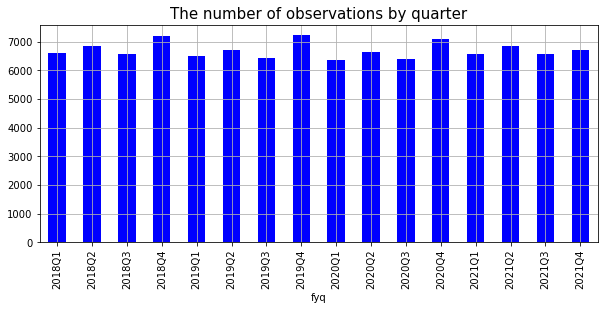

In [32]:
df.groupby(['fyq']).count()['cik'].plot(kind='bar', figsize=(10,4), grid= True, color= 'b')
plt.title('The number of observations by quarter', fontsize= 15)
plt.show()

<em> why high in Q4? Inspections needed. </em>

------------

In [22]:
by_month= df_20q4.value_counts('fyr').sort_index()
by_month

fyr
1      172
2       54
3      295
4       75
5       56
6      332
7       77
8       94
9      323
10     101
11      60
12    6129
dtype: int64

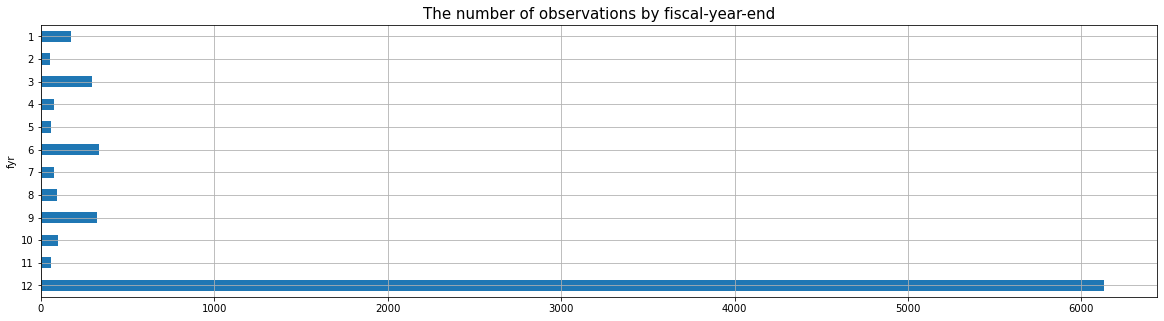

In [31]:
by_month.sort_index(ascending=False).plot(kind='barh', grid= True, figsize=(20,5))
plt.title('The number of observations by fiscal-year-end', fontsize= 15)                                          
plt.show()

-------------

### Save to .csv

In [34]:
df.to_csv("data/comp_fundq.csv", index= None)

### Close connection

In [35]:
conn.close()